# Exploratory Data Analysis: Raw Analyst Ratings
This notebook performs descriptive statistical analysis on the dataset, focusing on:
- Headline lengths.
- Article counts by publisher.
- Publication date trends.


## Import Necessary Libraries
In this section, we import the required Python libraries for analysis and visualization.


In [8]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Load the Dataset
The dataset is loaded into a pandas DataFrame for analysis. The file path needs to be updated based on your directory structure.


In [9]:
# Load the dataset
file_path = "../data/raw_analyst_ratings.csv"  # Update with your actual dataset path
data = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
data.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## Basic Statistics for Headline Lengths
We calculate the length of each headline in characters and summarize the basic statistics. 
A histogram is plotted to visualize the distribution of headline lengths.


In [10]:
# Calculate headline lengths
data['headline_length'] = data['headline'].apply(len)

# Basic statistics for headline lengths
headline_stats = data['headline_length'].describe()

print("Basic Statistics for Headline Lengths:")
print(headline_stats)


Basic Statistics for Headline Lengths:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


### Headline Length Distribution
The histogram below shows the distribution of headline lengths across the dataset.


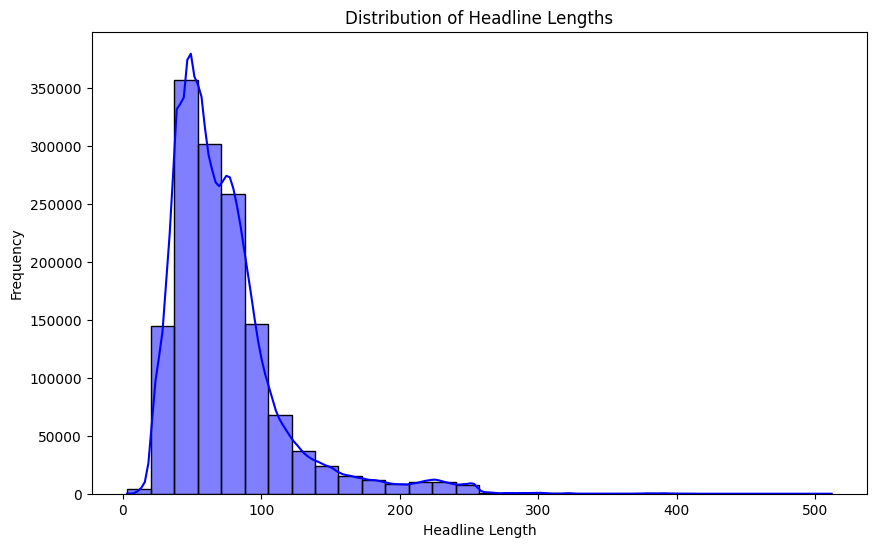

In [11]:
# Visualize headline length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['headline_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()


## Count Articles by Publisher
Here, we count the number of articles published by each publisher to identify publishing activity trends.


In [12]:
# Count the number of articles by publisher
publisher_counts = data['publisher'].value_counts()

print("Number of Articles by Publisher:")
print(publisher_counts)


Number of Articles by Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64


### Publisher Activity Visualization
The bar chart below shows the number of articles published by each publisher.


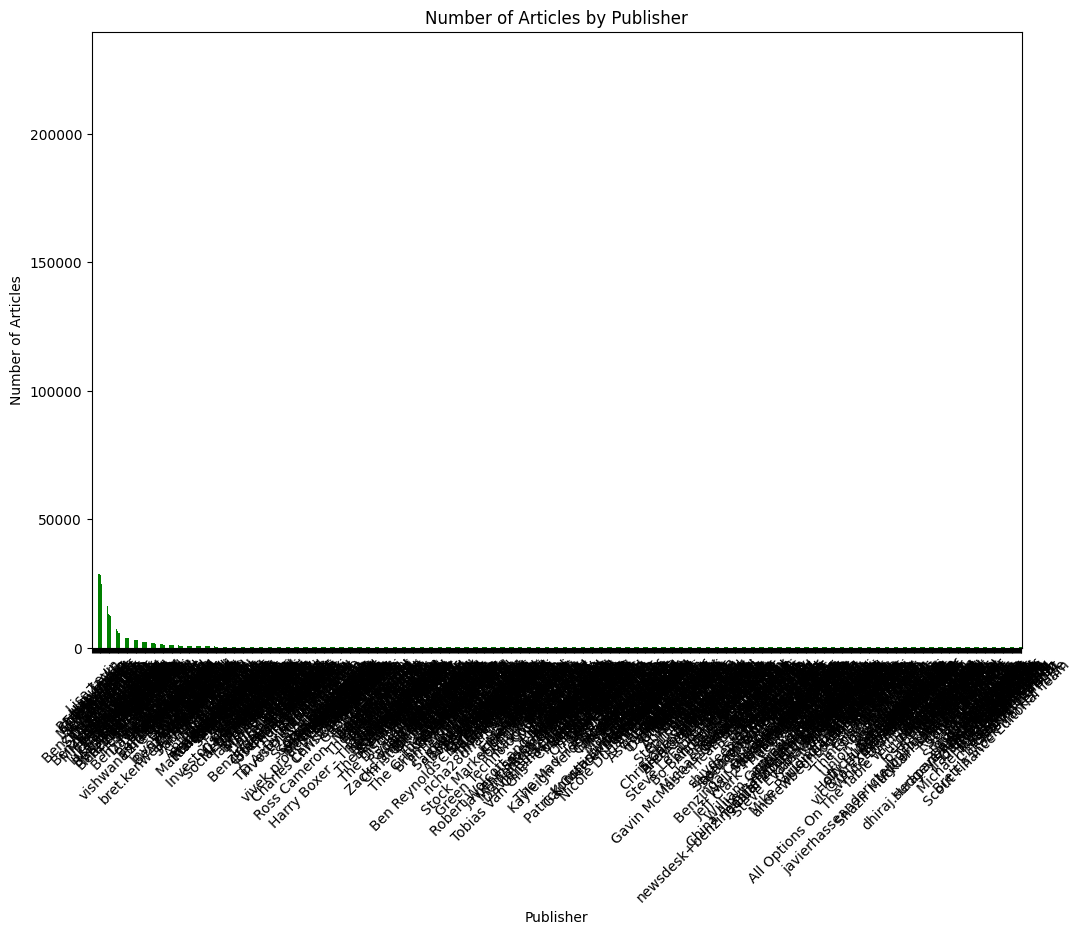

In [13]:
# Visualize publisher activity
plt.figure(figsize=(12, 8))
publisher_counts.plot(kind='bar', color='green')
plt.title('Number of Articles by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='center')
# plt.yticks(range(0, 80001, 10000))  # Ensure the last y-tick is 80000

plt.show()


## Publication Date Trends
We analyze trends in article publication over time by examining the distribution of publication dates.


In [14]:
# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Group by publication date to count articles
date_counts = data['date'].dt.date.value_counts().sort_index()

print("Number of Articles by Date:")
print(date_counts)


Number of Articles by Date:
date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64


### Publication Trends Over Time
The line chart below shows the number of articles published over time, highlighting trends or spikes during specific events.


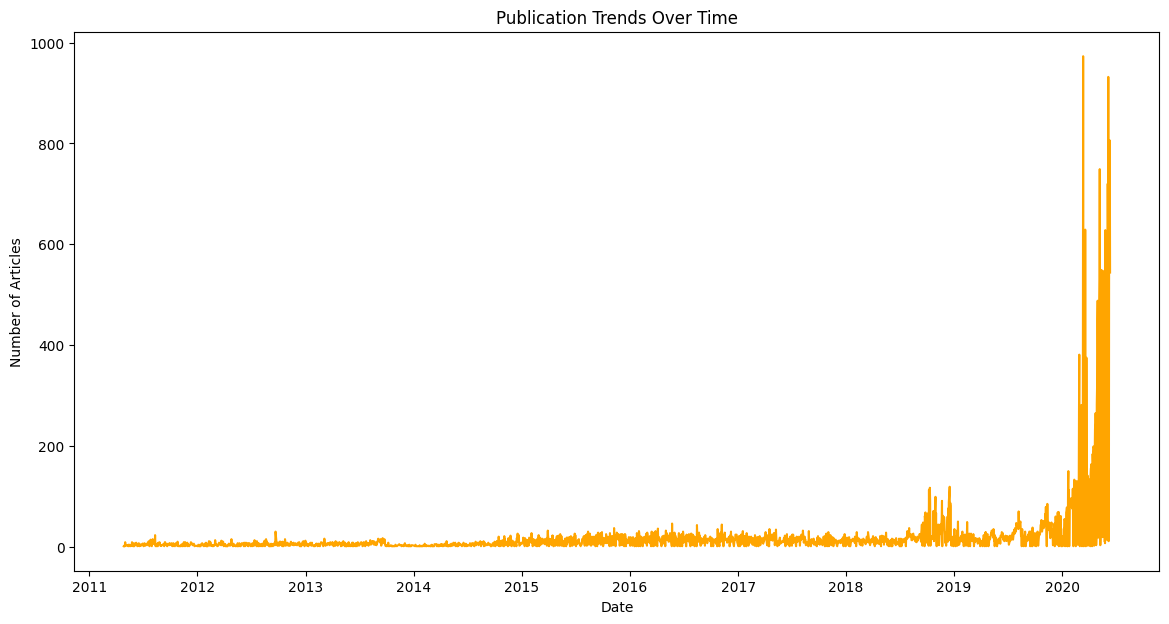

In [15]:
# Visualize publication trends over time
plt.figure(figsize=(14, 7))
date_counts.plot(kind='line', color='orange')
plt.title('Publication Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


## Text Analysis: Sentiment Analysis & Topic Modeling
In this section, we analyze the sentiment of headlines and extract common keywords or phrases using Natural Language Processing (NLP). This helps gauge the sentiment (positive, negative, neutral) and identify significant events or topics.


### Import Necessary Libraries for Text Analysis
We import additional libraries required for NLP tasks, such as `nltk` for sentiment analysis and `sklearn` for topic modeling.


In [17]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud


# Download necessary NLTK data
nltk.download('vader_lexicon')  # For sentiment analysis
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For stopwords

# Test the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
print(sia.polarity_scores("I love learning new things!"))


{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.6696}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\leulg\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leulg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leulg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Perform Sentiment Analysis on Headlines
Using `nltk.SentimentIntensityAnalyzer`, we calculate sentiment scores for each headline and classify them as positive, negative, or neutral.


In [18]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on headlines
data['sentiment_score'] = data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['sentiment'] = data['sentiment_score'].apply(
    lambda score: 'positive' if score > 0.05 else 'negative' if score < -0.05 else 'neutral'
)

# Display the distribution of sentiment categories
sentiment_counts = data['sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)


Sentiment Distribution:
sentiment
neutral     741200
positive    441852
negative    224276
Name: count, dtype: int64


### Visualize Sentiment Distribution
A bar chart is used to display the distribution of positive, negative, and neutral sentiments.


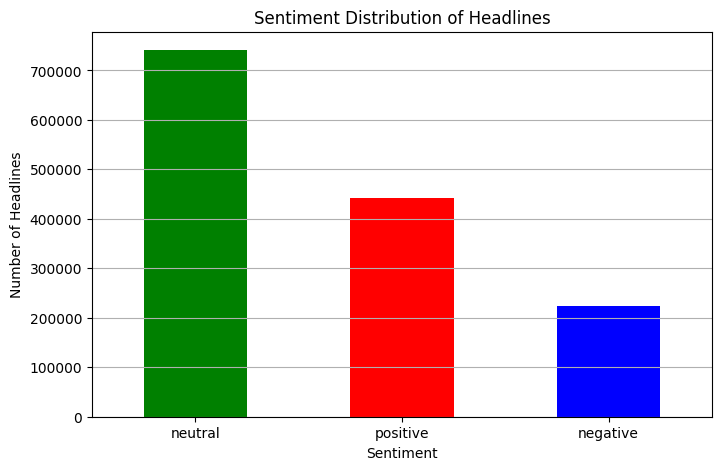

In [19]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Topic Modeling with NLP
We use the `CountVectorizer` to extract common keywords or phrases from the headlines. This helps uncover key topics or events in the data.


In [20]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=50)

# Fit and transform the headlines
word_matrix = vectorizer.fit_transform(data['headline'])
words = vectorizer.get_feature_names_out()

# Sum up the occurrences of each word
word_counts = word_matrix.sum(axis=0).tolist()[0]
word_freq = pd.DataFrame({'word': words, 'frequency': word_counts}).sort_values(by='frequency', ascending=False)

print("Top Keywords/Phrases:")
print(word_freq.head(10))


Top Keywords/Phrases:
        word  frequency
48        vs     162099
43    stocks     161776
15       est     140604
14       eps     128897
22    market     120558
41    shares     114313
34   reports     108710
46    update      91723
12  earnings      87399
35     sales      79645


### Visualize Keywords with a Word Cloud
Create a word cloud to visualize the most frequent keywords.


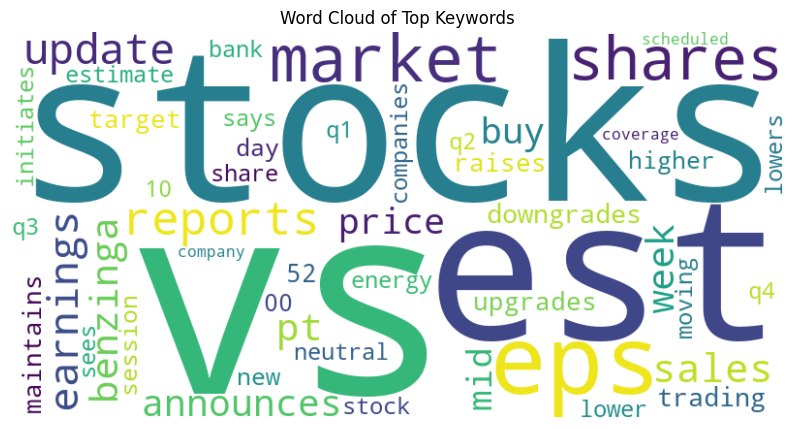

In [21]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(word_freq['word'], word_freq['frequency']))
)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Keywords')
plt.show()
